In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from config import get_cfg
from op import Operation

cfg = get_cfg()

operation = Operation(cfg, model_path='./exp/dropout-brains18=0321-024158/model.pth')

2020-03-21 10:17:55,767 - /home/zhengtao/Segmentation/BrainSeg/config.py[line:75] - INFO: config:
exp_dir: ./exp
epochs: 512
lr: 0.001
weight_decay: 0.0005
momentum: 0.9
epsilon: 1e-08
dropout: True
is_class_weight: False
data_name: dropout-brains18
n_classes: 9
batch_size: 10
num_workers: 8
folders: ['1', '5', '7', '4', '148', '070', '14']
is_tumor: False
val_folds: ['1']
train_folds: ['5', '7', '4', '148', '070', '14']
memory_gpu: [11178, 229, 229, 11178, 7473, 869, 11178, 11178]
device: cuda:0
cur_dir: ./exp/dropout-brains18=0321-101752
model_path: ./exp/dropout-brains18=0321-101752/model.pt
model_all_path: ./exp/dropout-brains18=0321-101752/model.pth
log_path: ./exp/dropout-brains18=0321-101752/exp.log
log: <Logger ./exp/dropout-brains18=0321-101752/exp.log (DEBUG)>

2020-03-21 10:18:09,441 - /home/zhengtao/Segmentation/BrainSeg/op.py[line:88] - INFO: Model loaded from ./exp/dropout-brains18=0321-024158/model.pth
2020-03-21 10:18:09,444 - /home/zhengtao/Segmentation/BrainSeg/op.py[

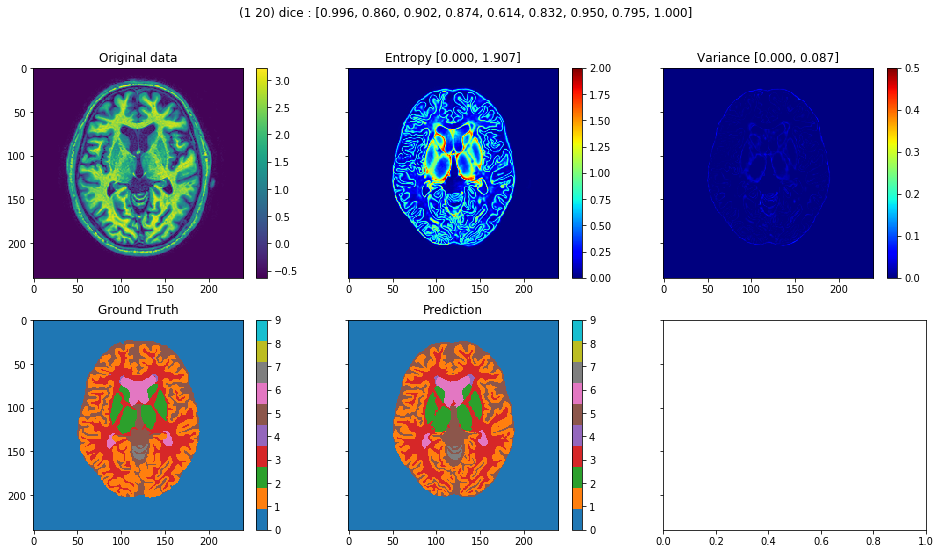

In [6]:
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict_sample(imgs[2], imgs[3], title='{} {}'.format(folder, slice_id), sample=True)
show_result(operation.val_data, [20])

In [7]:
operation.load_val_data()

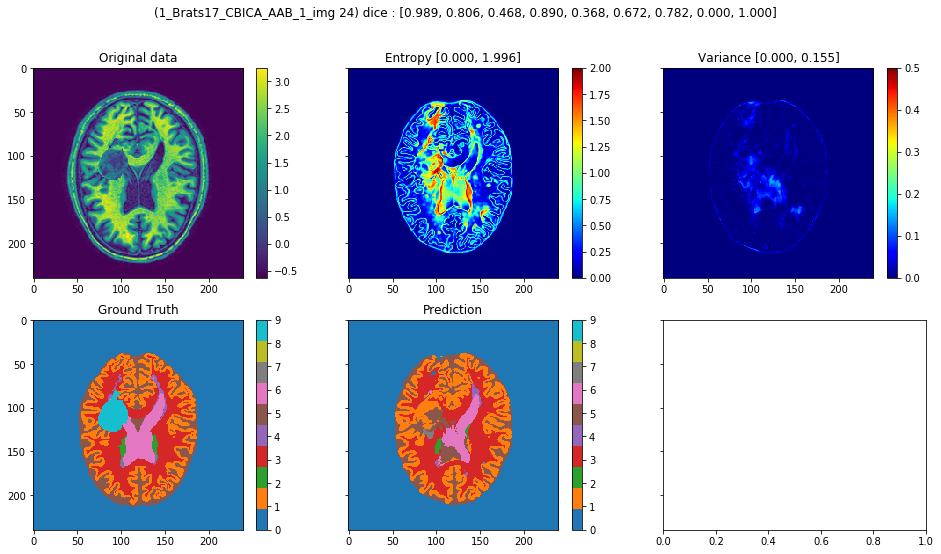

In [15]:
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict_sample(imgs[2], imgs[3], title='{} {}'.format(folder, slice_id), sample=True)
show_result(operation.val_data, [24])

In [ ]:
operation.rm_dir()

In [ ]:
operation.fit()

In [ ]:
import numpy as np

ids = np.random.randint(operation.val_data.__len__(), size=1)
show_result(operation.val_data, [20])